In [45]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    NAME
    Section #
    DATE

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [46]:
def RK4(x0,k,r,T,N=1000,delta=0.001):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, tf, n).
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    
    x = np.zeros(N+1)
    alpha = np.zeros(N+1)
    u = np.zeros(N+1)
    
    x[0] = x0
    alpha[-1] = 0

    while True:
        oldu = u.copy()
        oldx = x.copy()
        oldalpha = alpha.copy()
        
        for i in range(N):
            k1 = k*u[i]*x[i]
            k2 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k1)
            k3 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k2)
            k4 = k*u[i+1]*(x[i]+h*k3)
            x[i+1] = x[i]+h/6*(k1+2*k2+2*k3+k4)
        # you will need to do something similar for (1.6) but solve for alpha 
        # backwards in time and then use (1.7) to update u
        def f(u, alpha, t):
            return u * (np.exp(- r * t) - k * alpha) - np.exp(-r*t)
        for i in range(N, 0, -1):
            k1 = f(u[i], alpha[i], t[i])
            k2 = f(u[i], alpha[i] -h2*k1, t[i] - h2)
            k3 = f(u[i], alpha[i] -h2*k2, t[i] - h2)
            k4 = f(u[i], alpha[i] - h*k3, t[i] - h)
            alpha[i-1] = alpha[i] - h/6*(k1+2*k2+2*k3+k4)
            
        # Update the Control
        for i in range(len(u)):
            # Find sign of derivative
            if x[i] * (k * alpha[i] - np.exp(-r * t[i])) > 0:
                u[i] = 1
            else:
                u[i] = 0
        u = (oldu + u) / 2

        # use the following for your stopping criteria and stop once test > 0
        temp1 = delta*np.sum(np.abs(u)) - np.sum(np.abs(oldu - u))
        temp2 = delta*np.sum(np.abs(x)) - np.sum(np.abs(oldx - x))
        temp3 = delta*np.sum(np.abs(alpha)) - np.sum(np.abs(oldalpha - alpha))
        test = np.min([temp1, np.min([temp2, temp3])])
        if test > 0:
            break
            
    return x, alpha, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


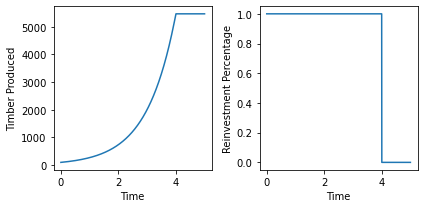

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

x0 = 100
k = 1
r = 0
T = 5

x, alpha, u = RK4(x0,k,r,T)
axs[0].plot(np.linspace(0, T, 1001), x)
axs[0].set_ylabel("Timber Produced")
axs[0].set_xlabel("Time")

axs[1].plot(np.linspace(0, T, 1001), u)
axs[1].set_ylabel("Reinvestment Percentage")
axs[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

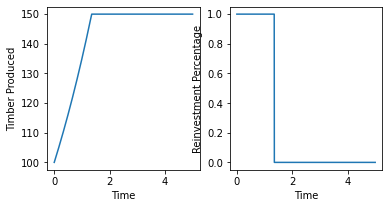

In [48]:
x0 = 100
k = .3
r = .05
T = 5

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

x, alpha, u = RK4(x0,k,r,T)
axs[0].plot(np.linspace(0, T, 1001), x)
axs[0].set_ylabel("Timber Produced")
axs[0].set_xlabel("Time")

axs[1].plot(np.linspace(0, T, 1001), u)
axs[1].set_ylabel("Reinvestment Percentage")
axs[1].set_xlabel("Time")
plt.show()

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


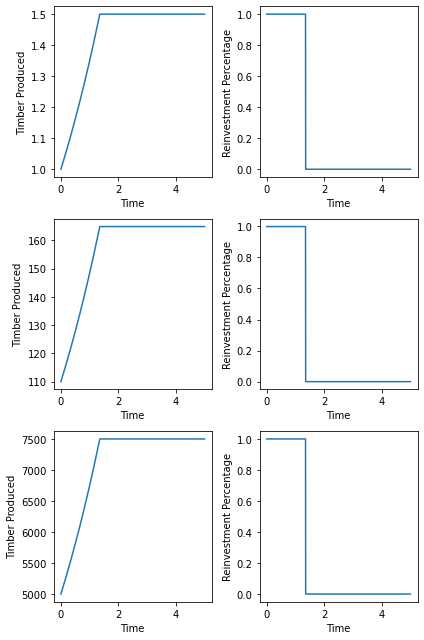

In [49]:
fig, axs = plt.subplots(3, 2, figsize=(6,9))
for i, x0 in enumerate([1, 110, 5000]):
    k = .3
    r = .05
    T = 5
    
    x, alpha, u = RK4(x0,k,r,T)
    axs[i, 0].plot(np.linspace(0, T, 1001), x)
    axs[i, 0].set_ylabel("Timber Produced")
    axs[i, 0].set_xlabel("Time")
    
    axs[i, 1].plot(np.linspace(0, T, 1001), u)
    axs[i, 1].set_ylabel("Reinvestment Percentage")
    axs[i, 1].set_xlabel("Time")
plt.tight_layout()
plt.show()